In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
#importing data

df        = pd.read_csv("Finaldemand.csv")
fc        = pd.read_csv("fiscalcalendar.csv")


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
#cleaning data

df         = df[df['orderNumber']!='Not Assigned']
df['PCRD'] = pd.to_datetime(df['PCRD'],format='%Y%m%d') 
df         = df[df['PCRD'].isin(pd.date_range('2016-01-01','2018-08-31'))]

fc['fiscalDate'] = pd.to_datetime(fc['fiscalDate'],format='%Y%m%d')

In [59]:
#adding columns to fiscal calendar dataset

fw = fc.groupby('fiscalWeek',as_index=False)['fiscalDate'].max().rename(columns = {'fiscalDate' : 'fiscalWeekmax'})
fc = pd.merge(fc,fw,on='fiscalWeek',how='left')
fp = fc.groupby('fiscalPeriod',as_index=False)['fiscalDate'].max().rename(columns = {'fiscalDate' : 'fiscalPeriodmax'})
fc = pd.merge(fc,fp,on='fiscalPeriod',how='left')
fq = fc.groupby('fiscalQuarter',as_index=False)['fiscalDate'].max().rename(columns = {'fiscalDate' : 'fiscalQuatermax'})
fc = pd.merge(fc,fq,on='fiscalQuarter',how='left')

fc.head()

,fiscalDate,fiscalWeek,fiscalPeriod,fiscalQuarter,fiscalYear,fiscalWeekmax,fiscalPeriodmax,fiscalQuatermax
0,1998-03-29,199901,199901,1999-1,1999,1998-04-04,1998-04-25,1998-06-27
1,1998-03-30,199901,199901,1999-1,1999,1998-04-04,1998-04-25,1998-06-27
2,1998-03-31,199901,199901,1999-1,1999,1998-04-04,1998-04-25,1998-06-27
3,1998-04-01,199901,199901,1999-1,1999,1998-04-04,1998-04-25,1998-06-27
4,1998-04-02,199901,199901,1999-1,1999,1998-04-04,1998-04-25,1998-06-27


In [60]:
df.head()

,orderNumber,orderLine,material,orderDate,PCRD,forecastGroup,customerParentID,demandQuantity,dollars,forecastGroup.1,pdpStage,pdpKickoffDate,pdpProdReleaseDate,marketSubgroup,businessGroup,businessUnitShort,productLineDesc
0,1067603,902,1114972,20160922,2016-09-02,HPS TAPE & REEL,101097,1.0,990.0,HPS TAPE & REEL,PD1,NaN,NaN,Radar,IDP,HPS,High Perf Solutions
1,1067603,201,1114972,20160508,2016-09-02,HPS TAPE & REEL,101097,1.0,880.0,HPS TAPE & REEL,PD1,NaN,NaN,Radar,IDP,HPS,High Perf Solutions
2,1067610,10,1092492,20160508,2016-06-16,EG7942,100498,1.0,18820.0,EG7942,PD7,NaN,20120308.0,Optical,IDP,TSP,Transport
3,1067610,10,1092492,20160508,2016-06-28,EG7942,100498,1.0,18820.0,EG7942,PD7,NaN,20120308.0,Optical,IDP,TSP,Transport
4,1067610,20,1092492,20160508,2016-07-14,EG7942,100498,1.0,18820.0,EG7942,PD7,NaN,20120308.0,Optical,IDP,TSP,Transport


In [61]:
df2 = pd.merge(df,fc,left_on='PCRD',right_on='fiscalDate',how='left')

df2.head()

,orderNumber,orderLine,material,orderDate,PCRD,forecastGroup,customerParentID,demandQuantity,dollars,forecastGroup.1,...,businessUnitShort,productLineDesc,fiscalDate,fiscalWeek,fiscalPeriod,fiscalQuarter,fiscalYear,fiscalWeekmax,fiscalPeriodmax,fiscalQuatermax
0,1067603,902,1114972,20160922,2016-09-02,HPS TAPE & REEL,101097,1.0,990.0,HPS TAPE & REEL,...,HPS,High Perf Solutions,2016-09-02,201722,201706,2017-2,2017,2016-09-03,2016-10-01,2016-10-01
1,1067603,201,1114972,20160508,2016-09-02,HPS TAPE & REEL,101097,1.0,880.0,HPS TAPE & REEL,...,HPS,High Perf Solutions,2016-09-02,201722,201706,2017-2,2017,2016-09-03,2016-10-01,2016-10-01
2,1067610,10,1092492,20160508,2016-06-16,EG7942,100498,1.0,18820.0,EG7942,...,TSP,Transport,2016-06-16,201711,201703,2017-1,2017,2016-06-18,2016-07-02,2016-07-02
3,1067610,10,1092492,20160508,2016-06-28,EG7942,100498,1.0,18820.0,EG7942,...,TSP,Transport,2016-06-28,201713,201703,2017-1,2017,2016-07-02,2016-07-02,2016-07-02
4,1067610,20,1092492,20160508,2016-07-14,EG7942,100498,1.0,18820.0,EG7942,...,TSP,Transport,2016-07-14,201715,201704,2017-2,2017,2016-07-16,2016-07-30,2016-10-01


In [62]:
#counting the number of succesive zeros till present
def myfunc(rolling_window) :
    count=0
    n=len(rolling_window)
    if rolling_window[-1]!=0 :
        return 0
    else :
        for i in range(0,n) :
                if rolling_window[n-i-1] ==0 :
                    count=count + 1
                else :
                    break
        return count
    
# counting the the difference in the number of months between the previous two non zero values
def myfunc1(rolling_window) : 
    n=len(rolling_window)
    k=n
    for i in range(0,n) :
        if rolling_window[n-i-1]!=0 : 
            k=n-i-1
            break
        else :
            k=n
    m=k
    for i in range(0,k) : 
        if rolling_window[k-i-1] !=0 :
            m=k-i-1
            break
        else :
            m=k
    return k-m

#counting the number of succesive nonzeros till lag6
def myfunc2(rolling_window) :
    count=0
    n=len(rolling_window)
    if rolling_window[-1]==0 :
        return 0
    else :
        for i in range(0,n) :
                if rolling_window[n-i-1]!=0 :
                    count=count + 1
                else :
                    break
        return count


In [63]:
#function to create all possible dates and customer combination

def func1(groupby,groupby_cols,fc) : 
    u_weeks    = fc[fc[groupby_cols[1]].isin(pd.date_range(groupby[groupby_cols[1]].min(),groupby[groupby_cols[1]].max()))][groupby_cols[1]].unique()
    u_customer = groupby[groupby_cols[0]].unique()
    groupby.set_index([groupby_cols[0],groupby_cols[1]], inplace=True)
    groupby = groupby.reindex(
        pd.MultiIndex.from_product(
            (u_customer,u_weeks),
            names=[groupby_cols[0],groupby_cols[1]]))
    return groupby

def create_lags(df3,groupby_cols,col) :
    for i in [1,2,4] :
        df3[col+'_lag'+'_'+str(i)]=df3.groupby(groupby_cols[0])[col].shift(i)
    return df3
    
        
        

def create_final_Dataset(df2,groupby_cols,fc) :
    df3 = df2.groupby(groupby_cols,as_index=False).agg({'orderLine' : 'count','orderNumber' : lambda x : x.nunique(),'demandQuantity' : 'sum','dollars' : 'sum','customerParentID' : lambda x : x.nunique()})
    df3 = df3.groupby(groupby_cols[0],as_index=False).apply(func1,(groupby_cols),(fc)).reset_index().drop(['level_0'],axis=1)
    df3.rename(columns = {'orderLine' : 'Number_of_bookings','orderNumber'  : 'Number_of_orders','customerParentID' : 'Num_of_cus'},inplace=True)
    return df3


# calculating deltas
def deltas(df3,groupby_cols,col) :
    df3.loc[:,col].fillna(0,inplace=True)
    df3['delta_' + col] = df3.groupby(groupby_cols[0])[col].rolling(window=2).apply(lambda x : x[1] - x[0]).reset_index(drop=True)
    return df3

# calculating time deltas
def timedeltas(df3,groupby_cols,col) :
    df3.loc[:,col].fillna(0,inplace=True)
    df3['zerocum_'+col]     = df3.groupby(groupby_cols[0])[col].rolling(window=50,min_periods=1).apply(myfunc).reset_index(drop=True)
    df3['nonzerocum_'+col]  = df3.groupby(groupby_cols[0])[col].rolling(window=50,min_periods=1).apply(myfunc2).reset_index(drop=True)
    df3['nzinterval_'+col]  = df3.groupby(groupby_cols[0])[col].rolling(window=50,min_periods=1).apply(myfunc1).reset_index(drop=True)
    return df3



In [64]:
 fc[fc['fiscalPeriodmax'].isin(pd.date_range('1998-04-25','1998-6-27'))]['fiscalPeriodmax']

0    1998-04-25
1    1998-04-25
2    1998-04-25
3    1998-04-25
4    1998-04-25
5    1998-04-25
6    1998-04-25
7    1998-04-25
8    1998-04-25
9    1998-04-25
10   1998-04-25
11   1998-04-25
12   1998-04-25
13   1998-04-25
14   1998-04-25
15   1998-04-25
16   1998-04-25
17   1998-04-25
18   1998-04-25
19   1998-04-25
20   1998-04-25
21   1998-04-25
22   1998-04-25
23   1998-04-25
24   1998-04-25
25   1998-04-25
26   1998-04-25
27   1998-04-25
28   1998-05-23
29   1998-05-23
        ...    
61   1998-06-27
62   1998-06-27
63   1998-06-27
64   1998-06-27
65   1998-06-27
66   1998-06-27
67   1998-06-27
68   1998-06-27
69   1998-06-27
70   1998-06-27
71   1998-06-27
72   1998-06-27
73   1998-06-27
74   1998-06-27
75   1998-06-27
76   1998-06-27
77   1998-06-27
78   1998-06-27
79   1998-06-27
80   1998-06-27
81   1998-06-27
82   1998-06-27
83   1998-06-27
84   1998-06-27
85   1998-06-27
86   1998-06-27
87   1998-06-27
88   1998-06-27
89   1998-06-27
90   1998-06-27
Name: fiscalPeriodmax, L

In [65]:
#week
groupby_cols = ['forecastGroup','fiscalWeekmax']
df3          = create_final_Dataset(df2,groupby_cols,fc)
df3          = deltas(df3,groupby_cols,'Number_of_orders')
df3          = deltas(df3,groupby_cols,'Num_of_cus')
df3          = deltas(df3,groupby_cols,'demandQuantity')
df3          = deltas(df3,groupby_cols,'dollars')
df3          = deltas(df3,groupby_cols,'Number_of_bookings')
df3          = create_lags(df3,groupby_cols,'demandQuantity')
df3          = timedeltas(df3,groupby_cols,'demandQuantity'+'_lag'+'_'+str(1))

df3['fickle']   = df3['delta_demandQuantity']/df3['zerocum_'+'demandQuantity'+'_lag'+'_'+str(1)]
df3['sequence'] = df3.groupby(groupby_cols[0]).cumcount() + 1


In [66]:
#period
groupby_cols = ['forecastGroup','fiscalPeriodmax']
df3_period          = create_final_Dataset(df2,groupby_cols,fc)
df3_period          = deltas(df3_period,groupby_cols,'Number_of_orders')
df3_period          = deltas(df3_period,groupby_cols,'Num_of_cus')
df3_period          = deltas(df3_period,groupby_cols,'demandQuantity')
df3_period          = deltas(df3_period,groupby_cols,'dollars')
df3_period          = deltas(df3_period,groupby_cols,'Number_of_bookings')
df3_period          = create_lags(df3_period,groupby_cols,'demandQuantity')
df3_period          = timedeltas(df3_period,groupby_cols,'demandQuantity'+'_lag'+'_'+str(1))

df3_period['fickle']   = df3_period['delta_demandQuantity']/df3_period['zerocum_'+'demandQuantity'+'_lag'+'_'+str(1)]
df3_period['sequence'] = df3_period.groupby(groupby_cols[0]).cumcount() + 1

In [67]:
#quarters
groupby_cols         = ['forecastGroup','fiscalQuatermax']
df3_quarter          = create_final_Dataset(df2,groupby_cols,fc)
df3_quarter          = deltas(df3_quarter,groupby_cols,'Number_of_orders')
df3_quarter          = deltas(df3_quarter,groupby_cols,'Num_of_cus')
df3_quarter          = deltas(df3_quarter,groupby_cols,'demandQuantity')
df3_quarter          = deltas(df3_quarter,groupby_cols,'dollars')
df3_quarter          = deltas(df3_quarter,groupby_cols,'Number_of_bookings')
df3_quarter          = create_lags(df3_quarter,groupby_cols,'demandQuantity')
df3_quarter          = timedeltas(df3_quarter,groupby_cols,'demandQuantity'+'_lag'+'_'+str(1))

df3_quarter['fickle']   = df3_quarter['delta_demandQuantity']/df3_quarter['zerocum_'+'demandQuantity'+'_lag'+'_'+str(1)]
df3_quarter['sequence'] = df3_quarter.groupby(groupby_cols[0]).cumcount() + 1

In [68]:
df3.head(40)

,forecastGroup,fiscalWeekmax,Number_of_bookings,Number_of_orders,demandQuantity,dollars,Num_of_cus,delta_Number_of_orders,delta_Num_of_cus,delta_demandQuantity,delta_dollars,delta_Number_of_bookings,demandQuantity_lag_1,demandQuantity_lag_2,demandQuantity_lag_4,zerocum_demandQuantity_lag_1,nonzerocum_demandQuantity_lag_1,nzinterval_demandQuantity_lag_1,fickle,sequence
0,1200,2016-05-07,2.0,2.0,80000.0,14810.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,NaN,1
1,1200,2016-05-14,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-80000.0,-14810.0,-2.0,80000.0,NaN,NaN,0.0,1.0,0.0,-inf,2
2,1200,2016-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0,NaN,1.0,0.0,0.0,0.000000e+00,3
3,1200,2016-05-28,2.0,2.0,5100.0,1843.0,2.0,2.0,2.0,5100.0,1843.0,2.0,0.0,0.0,NaN,2.0,0.0,0.0,2.550000e+03,4
4,1200,2016-06-04,1.0,1.0,30000.0,4890.0,1.0,-1.0,-1.0,24900.0,3047.0,-1.0,5100.0,0.0,80000.0,0.0,1.0,3.0,inf,5
5,1200,2016-06-11,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-30000.0,-4890.0,-1.0,30000.0,5100.0,0.0,0.0,2.0,1.0,-inf,6
6,1200,2016-06-18,1.0,1.0,100.0,64.0,1.0,1.0,1.0,100.0,64.0,1.0,0.0,30000.0,0.0,1.0,0.0,1.0,1.000000e+02,7
7,1200,2016-06-25,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-100.0,-64.0,-1.0,100.0,0.0,5100.0,0.0,1.0,2.0,-inf,8
8,1200,2016-07-02,1.0,1.0,5000.0,1800.0,1.0,1.0,1.0,5000.0,1800.0,1.0,0.0,100.0,30000.0,1.0,0.0,2.0,5.000000e+03,9
9,1200,2016-07-09,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-5000.0,-1800.0,-1.0,5000.0,0.0,0.0,0.0,1.0,2.0,-inf,10


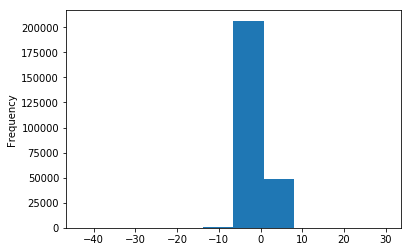

In [69]:
df3['delta_Number_of_orders'].plot(kind='hist')

In [70]:
df3['sequence'].max()

139

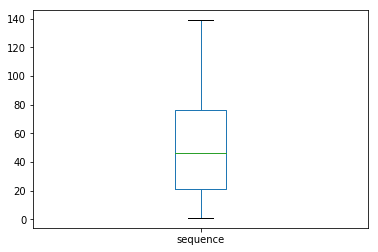

In [71]:
df3['sequence'].plot(kind='box')

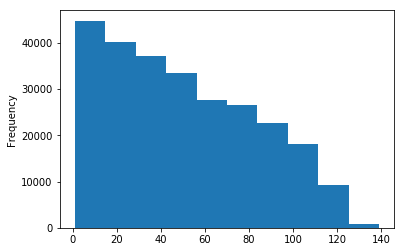

In [72]:
df3['sequence'].plot(kind='hist')

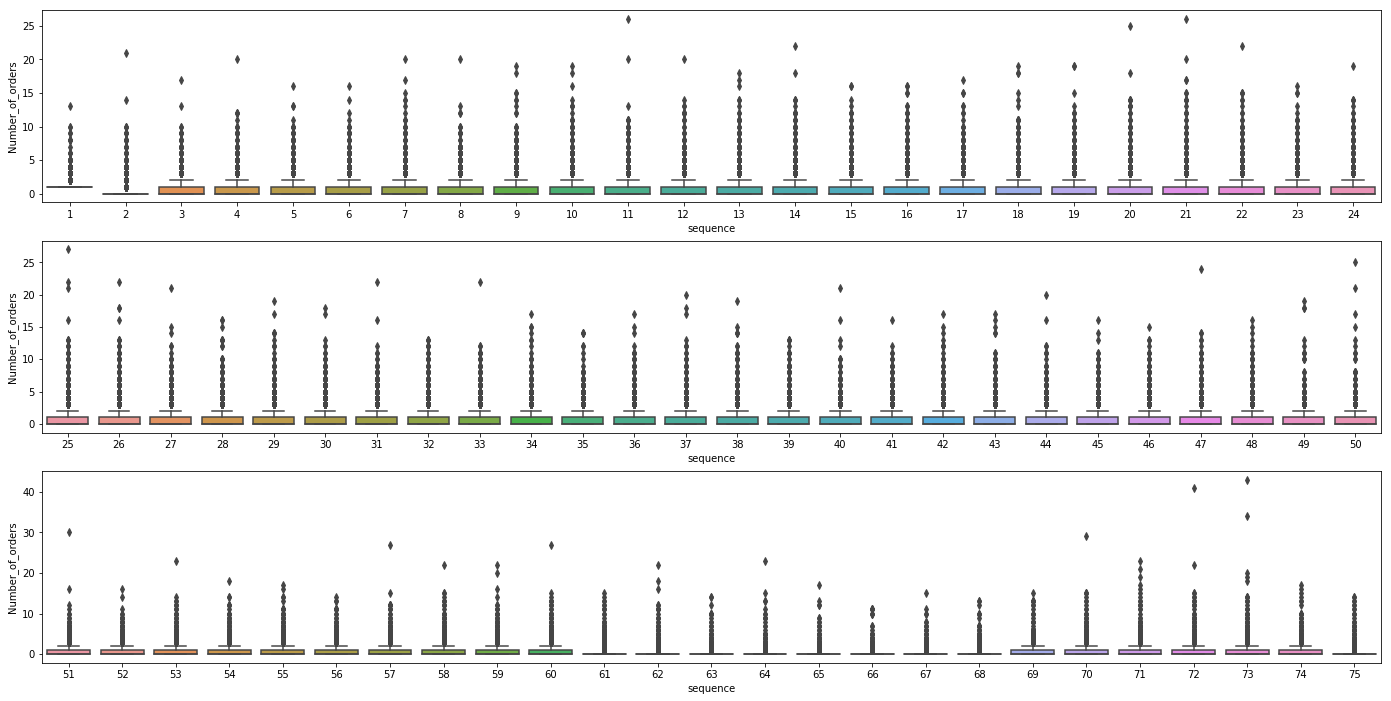

In [73]:
fig,axes = plt.subplots(3,1,figsize=(24,12))
sns.boxplot(data=df3[df3['sequence'].isin(range(1,25))],x='sequence',y='Number_of_orders',ax=axes[0])
sns.boxplot(data=df3[df3['sequence'].isin(range(25,51))],x='sequence',y='Number_of_orders',ax=axes[1])
sns.boxplot(data=df3[df3['sequence'].isin(range(51,76))],x='sequence',y='Number_of_orders',ax=axes[2])

In [74]:
df3_period.head()

,forecastGroup,fiscalPeriodmax,Number_of_bookings,Number_of_orders,demandQuantity,dollars,Num_of_cus,delta_Number_of_orders,delta_Num_of_cus,delta_demandQuantity,delta_dollars,delta_Number_of_bookings,demandQuantity_lag_1,demandQuantity_lag_2,demandQuantity_lag_4,zerocum_demandQuantity_lag_1,nonzerocum_demandQuantity_lag_1,nzinterval_demandQuantity_lag_1,fickle,sequence
0,1200,2016-05-28,4.0,4.0,85100.0,16653.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,NaN,1
1,1200,2016-07-02,3.0,3.0,35100.0,6754.0,3.0,-1.0,-1.0,-50000.0,-9899.0,-1.0,85100.0,NaN,NaN,0.0,1.0,0.0,-inf,2
2,1200,2016-07-30,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-35100.0,-6754.0,-3.0,35100.0,85100.0,NaN,0.0,2.0,1.0,-inf,3
3,1200,2016-08-27,3.0,3.0,3500.0,791.0,3.0,3.0,3.0,3500.0,791.0,3.0,0.0,35100.0,NaN,1.0,0.0,1.0,3500.000000,4
4,1200,2016-10-01,6.0,4.0,82500.0,27920.0,4.0,1.0,1.0,79000.0,27129.0,3.0,3500.0,0.0,85100.0,0.0,1.0,2.0,inf,5


In [75]:
df3.to_csv("FG_Weekly_sequence.csv",encoding='utf-8', index=False)
df3_period.to_csv("FG_Period_Sequence.csv",encoding='utf-8', index=False)
df3_quarter.to_csv("FG_Quarter_Sequence.csv",encoding='utf-8', index=False)

In [76]:
hmm = pd.read_csv("FG_Period_Sequence.csv")
hmm.head()

,forecastGroup,fiscalPeriodmax,Number_of_bookings,Number_of_orders,demandQuantity,dollars,Num_of_cus,delta_Number_of_orders,delta_Num_of_cus,delta_demandQuantity,delta_dollars,delta_Number_of_bookings,demandQuantity_lag_1,demandQuantity_lag_2,demandQuantity_lag_4,zerocum_demandQuantity_lag_1,nonzerocum_demandQuantity_lag_1,nzinterval_demandQuantity_lag_1,fickle,sequence
0,1200,2016-05-28,4.0,4.0,85100.0,16653.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,NaN,1
1,1200,2016-07-02,3.0,3.0,35100.0,6754.0,3.0,-1.0,-1.0,-50000.0,-9899.0,-1.0,85100.0,NaN,NaN,0.0,1.0,0.0,-inf,2
2,1200,2016-07-30,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-35100.0,-6754.0,-3.0,35100.0,85100.0,NaN,0.0,2.0,1.0,-inf,3
3,1200,2016-08-27,3.0,3.0,3500.0,791.0,3.0,3.0,3.0,3500.0,791.0,3.0,0.0,35100.0,NaN,1.0,0.0,1.0,3500.000000,4
4,1200,2016-10-01,6.0,4.0,82500.0,27920.0,4.0,1.0,1.0,79000.0,27129.0,3.0,3500.0,0.0,85100.0,0.0,1.0,2.0,inf,5


In [77]:
hmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63311 entries, 0 to 63310
Data columns (total 20 columns):
forecastGroup                      63311 non-null object
fiscalPeriodmax                    63311 non-null object
Number_of_bookings                 63311 non-null float64
Number_of_orders                   63311 non-null float64
demandQuantity                     63311 non-null float64
dollars                            63311 non-null float64
Num_of_cus                         63311 non-null float64
delta_Number_of_orders             59263 non-null float64
delta_Num_of_cus                   59263 non-null float64
delta_demandQuantity               59263 non-null float64
delta_dollars                      59263 non-null float64
delta_Number_of_bookings           59263 non-null float64
demandQuantity_lag_1               63311 non-null float64
demandQuantity_lag_2               56042 non-null float64
demandQuantity_lag_4               49862 non-null float64
zerocum_demandQuantity_

In [ ]:
df3[df3['customerParentID']==107652]['demandQuantity'].plot(kind='box')

In [ ]:
def valley_peak_mean(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.mean(np.array(valley_end) - np.array(valley_start))
    else :
        return np.mean(np.array(valley_end[0:-1]) - np.array(valley_start))

In [ ]:
def valley_peak_median(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.median(np.array(valley_end) - np.array(valley_start))
    else :
        return np.median(np.array(valley_end[0:-1]) - np.array(valley_start))

def valley_peak_std(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.std(np.array(valley_end) - np.array(valley_start))
    else :
        return np.std(np.array(valley_end[0:-1]) - np.array(valley_start))

In [ ]:
def valley_peak_start_diff_mean(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.mean(np.diff(np.array(valley_start)))
    else :
        return np.mean(np.diff(np.array(valley_start)))
    
def valley_peak_start_diff_median(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.median(np.diff(np.array(valley_start)))
    else :
        return np.median(np.diff(np.array(valley_start)))

def valley_peak_start_diff_std(series) : 
    n = len(series)
    k = 0
    m = 0
    i = 0
    valley_end   = []
    valley_start = []
    while i < n : 
        if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
            k = i+1
            valley_start.append(k)
            for i in range(k-1,n) :
                if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                    m = i+1
                    valley_end.append(m)
                    break
                else :
                    m = n
            i = m-1
            if i == n-1 :
                valley_end.append(i+1)
                break
        else :
            i = i+1
    if len(valley_end) == len(valley_start) :
        return np.std(np.diff(np.array(valley_start)))
    else :
        return np.std(np.diff(np.array(valley_start)))

In [ ]:
df3.head()

In [ ]:
cus_ord_pattern                    = df3.groupby('customerParentID',as_index=False).agg({'demandQuantity' : lambda x :valley_peak_mean(x)})
cus_ord_pattern['VLmedian']        = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : valley_peak_median(x))
cus_ord_pattern['VLstd']        = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : valley_peak_std(x))
cus_ord_pattern['tbvsmean']        = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : valley_peak_start_diff_mean(x))
cus_ord_pattern['tbvsmedian']      = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : valley_peak_start_diff_median(x))
cus_ord_pattern['tbvsstd']      = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : valley_peak_start_diff_std(x))
cus_ord_pattern['maxweek']         = df3.groupby('customerParentID',as_index=False)['sequence'].apply(lambda x : x.max())
cus_ord_pattern['numberofnonzero'] = df3.groupby('customerParentID',as_index=False)['demandQuantity'].apply(lambda x : (x!=0).sum())
cus_ord_pattern['ratio']           = cus_ord_pattern['numberofnonzero']/cus_ord_pattern['maxweek']


In [ ]:
cus_ord_pattern  = cus_ord_pattern.rename(columns = {'demandQuantity' :'VLmean'})

In [ ]:
cus_ord_pattern['ratio1'] = cus_ord_pattern['VLmean']/cus_ord_pattern['maxweek']

In [ ]:
cus_ord_pattern.head()

In [ ]:
cus_ord_pattern.to_csv("cus_ord_pattern.csv",encoding='utf-8', index=False)

In [ ]:
df3['customerParentID'].unique()  #100091 100108

In [ ]:
f = df3[df3['customerParentID']==100214].copy()
f = f[['customerParentID','demandQuantity','sequence']]
f

In [ ]:
series=f['demandQuantity']
n = len(series)
k = 0
m = 0
i = 0
valley_end   = []
valley_start = []
while i < n : 
    if series.values[i] <= 105 :
        k = i+1
        valley_start.append(k)
        for i in range(k-1,n) :
            if series.values[i] >= series[series!=0].mean() - 1*series[series!=0].std() :
                m = i+1
                valley_end.append(m)
                break
        i = m-1
    else :
        i = i+1

In [ ]:
series=f['demandQuantity']
n = len(series)
k = 0
m = 0
i = 0
valley_end   = []
valley_start = []
while i < n : 
    if series.values[i] <= np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
        k = i+1
        valley_start.append(k)
        for i in range(k-1,n) :
            if series.values[i] > np.amax(np.array([0,series[series!=0].mean() - 1.2 * series[series!=0].std()])) :
                m = i+1
                valley_end.append(m)
                break
            else :
                m = n
        i = m-1
        if i == n-1 :
            valley_end.append(i+1)
            break
    else :
        i = i+1

In [ ]:
series[series!=0].mean() - 1.2 * series[series!=0].std()

In [ ]:
valley_start

In [ ]:
valley_end[0:-1]

In [ ]:
series.std()

In [ ]:
np.array(valley_end)-np.array(valley_start)

In [ ]:
np.diff(np.array(valley_start))

In [ ]:
series.median()-series.std()

In [ ]:
series.median()

In [ ]:
series.std()

In [ ]:
series[series!=0]

In [ ]:
AAPL = pd.read_csv("AAPL.csv")

In [ ]:
AAPL.head()

In [ ]:
AAPL.info()

In [ ]:
apple = df3[df3['customerParentID']==107652]
apple.head()

In [ ]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'],format = '%Y-%m-%d')
AAPL = pd.merge(AAPL,fc[['fiscalDate','fiscalWeekmax']],left_on='Date',right_on='fiscalDate',how='left')

AAPL.head()

In [ ]:
apple = pd.merge(apple,AAPL[['fiscalWeekmax','Open']],on='fiscalWeekmax',how='left')
apple.head()

In [ ]:
apple.to_csv("apple.csv",encoding='utf-8', index=False)

In [ ]:
df3.head()

In [ ]:
seasons         = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))
month_to_season

In [ ]:
df3['Season'] = df3['fiscalWeekmax'].dt.month.map(month_to_season)

In [ ]:
df3.head()

In [ ]:

sns.boxplot(data=df3,x='Season',y='demandQuantity')

In [ ]:
sns.boxplot(data=df3,x='Season',y='Num_of_FG')

In [ ]:
sns.countplot(data = df3[df3['demandQuantity'] !=0],x = 'Season')

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df3.drop(['customerParentID','sequence'],axis=1).corr(),cmap='Blues',annot=False) 